In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
import math

import datetime

%matplotlib inline
plt.style.use('ggplot')

In [3]:
file = pd.read_csv('data/Collisions.csv')

In [4]:
# ask phil what do i do with the nans in the UNDERINFL column? 
# The non drunk driving percentages seem like they should be lower?

In [5]:
#I started with an EDA of the data - looking at drunk driving vs non drunk driving data set from 2004 to present.

#Under the infuence accidents have a Y or a 1. Accidents not under the influece have a N or 0.

#the infl_result_fatality variable finds the total number of accidents that someone was under the influence and a resulted in fatality
infl_result_fatality = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| 
                            ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]

#the drunk_driving_acc variable finds the total number of drunk driving accidents
total_drunk_driving_acc = sum((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))


#percentage of accidents that involved a drunk driver and resulted in a death
print('Percentage of drunk driving accidents that result in a death: ',
                                str(round(100*infl_result_fatality/total_drunk_driving_acc,2))+'%')

#the non_drunk_drive_result_fatality variable finds the number accidents that someone was not under the influence but resulted in a fatality
non_infl_result_fatality = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| 
                                       ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]

#the total_non_drunk_drive_acc variable finds the total number of nondrunk driving accidents
total_non_drunk_drive_acc = sum((file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0'))

#percentage of accidents that did not involve a drunk driver and resulted in a death
print('Percentage of NON-drunk driving accidents that result in a death: ',
                                str(round(100*non_infl_result_fatality/total_non_drunk_drive_acc,2))+'%')

Percentage of drunk driving accidents that result in a death:  0.97%
Percentage of NON-drunk driving accidents that result in a death:  0.13%


In [6]:
#this set of code is to find serious injury percentages

#infl_result_serious_injury variable variable finds total number of accidents where some was under the influence and resulted in a serious injury
infl_result_serious_injury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| 
                                  ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]


#percentage of accidents that involved a drunk driver and resulted in a serious injuury
print('Percentage of drunk driving accidents that result in serioius injuries: ',
                                        str(round(100*infl_result_serious_injury/total_drunk_driving_acc,2))+'%')

#non_infl_result_serious_injury variable finds total number of accidents where some was not under the influence but resulted in a serious injury
non_infl_result_serious_injury = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| 
                                      ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]


#percentage of accidents that did not involve a drunk driver and resulted in a serious injury
print('Percentage of NON-drunk driving accidents that result in serious injuries: ',
                                        str(round(100*non_infl_result_serious_injury/total_non_drunk_drive_acc,2))+'%')

Percentage of drunk driving accidents that result in serioius injuries:  4.49%
Percentage of NON-drunk driving accidents that result in serious injuries:  1.43%


In [7]:
#this set of code is to find injury percentages

#infl_resulted_injury variable finds total number of accidents where some was under the influence and resulted in an injury
infl_resulted_injury = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| 
                            ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]

#non_infl_resulted_injury variable finds total number of accidents where some was NOT under the influence and resulted in an injury
non_infl_resulted_injury = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| 
                                ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]

#percentage of accidents that involved a drunk driver and resulted in an injury
print('Percentage of drunk driving accidents that result in injuries:',
      str(round(100*infl_resulted_injury/total_drunk_driving_acc,2))+'%')

#percentage of accidents that did not involve a drunk driver and resulted in an injury
print('Percentage of NON-drunk driving accidents that result in injuries:',
      str(round(100*non_infl_resulted_injury/total_non_drunk_drive_acc,2))+'%')

Percentage of drunk driving accidents that result in injuries: 41.83%
Percentage of NON-drunk driving accidents that result in injuries: 30.52%


In [8]:
#The ST_COLCODE is a collision code. Anything 5 and below is an accident that involved a pedestrian that resulted in death. 
#this line below changes the values from string to ints
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')

#ped_fatalties variable finds total number of accidents where a pedestrian died
ped_fatalties = sum((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5))

#non_ped_fatalties variable finds total number of accidents where a pedestrian did not die
non_ped_fatalities = sum((file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10))

#fatalities is the total number of fatalities
fatalities = (file['FATALITIES'] > 0).sum()

#printing percentage of accidents that involved a pedestrian death over the number of accident deaths
print('Percentage of fatalities that involve a pedestrian: ',str(round(ped_fatalties/fatalities*100,2))+'%')

#ped_serious variable finds total number of accidents where a pedestrian had a serious injury
ped_serious = ((file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()

#serious_total variable is the total number of accidents involving a serious injuries
serious_total = (file['SERIOUSINJURIES'] > 0).sum()

#printing percentage of accidents that involved a pedestrian with a serious injury over the total number of seriuos injuries
print('Percentage of serious injuries that involve a pedestrian: ',str(round(ped_serious/serious_total*100,2))+'%')

#ped_injuries variable finds total number of accidents where a pedestrian had an injury
ped_injuries =((file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)).sum()

#injuries_total variable is the total number of accidents involving a serious injuries
injuries_total = (file['INJURIES'] > 0).sum()
print('Percentage of injuries that involve a pedestrian: ',str(round(ped_injuries/injuries_total*100,2))+'%')

Percentage of fatalities that involve a pedestrian:  35.06%
Percentage of serious injuries that involve a pedestrian:  28.19%
Percentage of injuries that involve a pedestrian:  11.36%


In [9]:
file2 = file.copy()

In [10]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [11]:
#make a function that converts time to datetime. If there is no time return a datetime object without the hours, min, etc.
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [12]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)

In [13]:
#create a fuction that that gets hourly weather data from the beginning of the dataset. Calls the dark sky API 
def getweather():
    url = 'https://api.darksky.net/forecast/'
    with open('data/dark_sky.txt', 'r') as file:
        key = file.read()
    latlong = '/47.44472,-122.31361,'
    for i in range(5683): #5682 is number of days from beg to end
        time = 1389346020 + (i*24*60*60)
        strtime = str(time)
        finalurl= url+key+latlong+strtime
        r = requests.get(finalurl)
        dic = json.loads(r.content)
        Weather.insert_one(dic)
 
    

In [13]:
#getweather()

In [15]:
from pymongo import MongoClient
import pprint

In [16]:
#create a Mongo database
client = MongoClient('localhost', 27017)
db = client['WeatherDB']
Weather = db['Weather']

In [17]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'latitude': 47.44472,
 'longitude': -122.31361,
 'timezone': 'America/Los_Angeles',
 'currently': {'time': 1389346020,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 45.55,
  'apparentTemperature': 41.78,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'pressure': 1012.59,
  'windSpeed': 7.1,
  'windGust': 15.46,
  'windBearing': 202,
  'cloudCover': 0.75,
  'uvIndex': 0,
  'visibility': 10},
 'hourly': {'summary': 'Light rain overnight and in the evening.',
  'icon': 'rain',
  'data': [{'time': 1389340800,
    'summary': 'Mostly Cloudy',
    'icon': 'partly-cloudy-night',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 45.72,
    'apparentTemperature': 41.82,
    'dewPoint': 42.8,
    'humidity': 0.89,
    'pressure': 1011.21,
    'windSpeed': 7.42,
    'windGust': 14.25,
    'windBearing': 205,
    'cloudCover': 0.75,
    'uvIndex': 0,
  

In [18]:
#create a function that pulls the rain info from the database
def getprecipitation(info):
    #find all of the weather info store it variable times
    times = info.find({})
    #set info to a dictionary
    info = dict()
    #iterate over all of the times
    for time in times:
        #within those times I need to get the precipitation data so I do another for loop.
        for i in range(len(time['hourly']['data'])):
            #This goes into the hourly key, then the data key, then the next level is a list. 
            #then the code goes into the list and finds the time.
            t = time['hourly']['data'][i]['time']
            #Using a try except block I find the hourly precipitation data and if that field isn't there I continue
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            #convert the utc format into datetime
            dt = datetime.datetime.utcfromtimestamp(t)#-datetime.timedelta(hours=8)
            #add the time as a key and the precipitation as a value
            info[dt] = rain
    return info

In [19]:
#create a dictionary of times and weather precipitation
rain = getprecipitation(Weather)
#create a dataframe with the index the time and the column the amount of precipitation
rainpd = pd.DataFrame.from_dict(rain, orient='index')
rainpd

,0
2014-01-10 08:00:00,0.0000
2014-01-10 09:00:00,0.0000
2014-01-10 10:00:00,0.0000
2014-01-10 11:00:00,0.0000
2014-01-10 12:00:00,0.0000
...,...
2029-08-02 02:00:00,0.0029
2029-08-02 03:00:00,0.0029
2029-08-02 04:00:00,0.0030
2029-08-02 05:00:00,0.0029


In [20]:
def get_no_rain_list(df,target_hrs):
    count = 0
    lst = []
    #use a for loop with shape of the precpiptation df and the index of df as things to loop over
    for i, index in zip(range(df.shape[0]),df.index):
        #if there is no rain in the time period we add 1 to the count
        if df.iloc[i,0] == 0:
            count += 1
        # if there is any amount of rain in the time period we see if 
        # the count (number of consecutive dry periods), is less than target_hrs (the number of dry periods we are looking for)
        # then append that time to a list
        if df.iloc[i,0] != 0:
            if count >= target_hrs:
                lst.append(index)
            #reset count so we don't get back to back rainy periods
            count = 0
    #return list of times
    return lst

def get_rain_list(df,target_hrs,level):
    count = 0
    lst = []
    #use a for loop with shape of the precpitation df and the index of df as things to loop over
    for i, index in zip(range(df.shape[0]),df.index):
        #if the row is more than level (the particular amount of precipitation you are setting) add 1 to count
        if df.iloc[i,0] > level:
            count += 1
        #when the row is less than the level you set, set count back to zero and append the index (time).
        if df.iloc[i,0] <= level:
            if count >= target_hrs:
                lst.append(index)
            count = 0
    #return list of times
    return lst

In [47]:
dry_then_wet_lst = get_no_rain_list(rainpd,7)
dry_nine_hr_lst = get_no_rain_list(rainpd,9)
serious_rain = get_rain_list(rainpd,1,.1)
four_hours_wet_accident_lst = get_rain_list(rainpd,4,0)
four_hours_wet_accident_lst_heavy_rain = get_rain_list(rainpd,4,.03)

In [48]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [49]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [50]:
def severity_wet_accidents_dict(df,lst,kind,timeback):
    diction = dict()
    dictionary = dict()
    #find all the rows where the datetime does not have a 0 minute or on the 0 hour.
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        time = i.to_pydatetime()
        #find time how far back you want to go (multiples of 60) and 59 minutes after the timeback.
        timebefore = time - datetime.timedelta(minutes=(timeback*60))
        timeafter =  time - datetime.timedelta(minutes=(timeback*60) + 60)
        accidents = sum(df[(df['INCDTTM']> timeafter) & (df['INCDTTM']<= timebefore) & (df[kind] > 0)][kind])
        if accidents > 0:
            #dictionary of times and number of accidents and the severity
            diction[time] = accidents
    return diction

In [51]:
#injuries with the four hours wet condition
wet_four_hr_injuries_dict = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst,'INJURIES',0)
wet_four_hr_injuries_dict

{datetime.datetime(2014, 1, 11, 18, 0): 3,
 datetime.datetime(2014, 1, 29, 16, 0): 2,
 datetime.datetime(2014, 2, 17, 18, 0): 1,
 datetime.datetime(2014, 2, 21, 18, 0): 2,
 datetime.datetime(2014, 2, 24, 2, 0): 1,
 datetime.datetime(2014, 2, 24, 8, 0): 1,
 datetime.datetime(2014, 3, 3, 8, 0): 2,
 datetime.datetime(2014, 3, 5, 7, 0): 1,
 datetime.datetime(2014, 3, 5, 20, 0): 2,
 datetime.datetime(2014, 3, 10, 10, 0): 1,
 datetime.datetime(2014, 3, 16, 10, 0): 2,
 datetime.datetime(2014, 3, 17, 7, 0): 1,
 datetime.datetime(2014, 4, 6, 3, 0): 1,
 datetime.datetime(2014, 4, 17, 3, 0): 1,
 datetime.datetime(2014, 4, 17, 23, 0): 1,
 datetime.datetime(2014, 4, 22, 17, 0): 3,
 datetime.datetime(2014, 4, 24, 14, 0): 1,
 datetime.datetime(2014, 5, 4, 17, 0): 1,
 datetime.datetime(2014, 5, 5, 19, 0): 2,
 datetime.datetime(2014, 9, 24, 20, 0): 1,
 datetime.datetime(2014, 9, 25, 21, 0): 1,
 datetime.datetime(2014, 10, 28, 19, 0): 4,
 datetime.datetime(2014, 10, 31, 20, 0): 2,
 datetime.datetime(201

In [52]:
wet_four_hour_serious_injuries_dict = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst,'SERIOUSINJURIES',0)
wet_four_hour_serious_injuries_dict
#not a big sample from serious injuries with the four hour wet condition

{datetime.datetime(2014, 2, 24, 2, 0): 1,
 datetime.datetime(2014, 4, 6, 3, 0): 1,
 datetime.datetime(2016, 1, 6, 2, 0): 1,
 datetime.datetime(2016, 3, 13, 14, 0): 1,
 datetime.datetime(2016, 5, 20, 8, 0): 1,
 datetime.datetime(2016, 10, 27, 8, 0): 1,
 datetime.datetime(2017, 1, 20, 2, 0): 2,
 datetime.datetime(2017, 4, 12, 18, 0): 1,
 datetime.datetime(2019, 1, 3, 19, 0): 1,
 datetime.datetime(2019, 3, 7, 3, 0): 1,
 datetime.datetime(2019, 4, 6, 1, 0): 1}

In [53]:
wet_four_hour_fatalities_dict = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst,'FATALITIES',0)
wet_four_hour_fatalities_dict
#no fatalities with this wet condition

#i won't use serious injuries and fatalities in analysis because the samples are too small.

{}

In [54]:
print('AVG number of regular injuries per time period for WET FOUR HOURS:', sum(wet_four_hr_injuries_dict.values())/len(wet_four_hr_injuries_dict.values()))
wet_four_hours = sum(wet_four_hr_injuries_dict.values())/len(wet_four_hr_injuries_dict.values())





AVG number of regular injuries per time period for WET FOUR HOURS: 1.6568047337278107


In [55]:
wet_four_hour_fatalities_heavy_dict = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst_heavy_rain,'INJURIES',-1)

wet_four_hour_fatalities_heavy_dict


{datetime.datetime(2014, 2, 17, 10, 0): 1,
 datetime.datetime(2014, 3, 3, 2, 0): 1,
 datetime.datetime(2014, 3, 5, 15, 0): 5,
 datetime.datetime(2014, 3, 9, 8, 0): 1,
 datetime.datetime(2014, 3, 17, 6, 0): 1,
 datetime.datetime(2014, 4, 18, 4, 0): 1,
 datetime.datetime(2014, 5, 4, 8, 0): 2,
 datetime.datetime(2014, 9, 24, 9, 0): 1,
 datetime.datetime(2014, 10, 31, 19, 0): 2,
 datetime.datetime(2014, 12, 10, 13, 0): 3,
 datetime.datetime(2014, 12, 19, 9, 0): 1,
 datetime.datetime(2014, 12, 24, 12, 0): 1,
 datetime.datetime(2015, 1, 16, 8, 0): 2,
 datetime.datetime(2015, 3, 14, 15, 0): 3,
 datetime.datetime(2015, 3, 16, 8, 0): 2,
 datetime.datetime(2015, 4, 11, 8, 0): 2,
 datetime.datetime(2015, 4, 14, 7, 0): 1,
 datetime.datetime(2015, 8, 15, 3, 0): 1,
 datetime.datetime(2015, 11, 14, 9, 0): 2,
 datetime.datetime(2015, 11, 15, 18, 0): 2,
 datetime.datetime(2015, 11, 18, 1, 0): 1,
 datetime.datetime(2015, 12, 6, 1, 0): 2,
 datetime.datetime(2015, 12, 8, 17, 0): 3,
 datetime.datetime(2015

In [56]:
wet_four_hour_fatalities_heavy_dict_serious = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst_heavy_rain,'SERIOUSINJURIES',-1)

wet_four_hour_fatalities_heavy_dict_serious

#again small sample of serious injuries so will skip from here 

{datetime.datetime(2015, 12, 6, 1, 0): 1,
 datetime.datetime(2019, 1, 3, 18, 0): 1}

In [57]:
wet_four_hour_fatalities_heavy_dict_fatalities = severity_wet_accidents_dict(file2,four_hours_wet_accident_lst_heavy_rain,'FATALITIES',-1)

wet_four_hour_fatalities_heavy_dict_fatalities

#small sample of fatalities so will skip in analysis and just use regular injuries

{}

In [58]:
print('AVG number of regular injuries per time period for HEAVIER RAIN FOUR HOURS:', sum(wet_four_hour_fatalities_heavy_dict.values())/len(wet_four_hour_fatalities_heavy_dict.values()))


heavier_rain_4_hours=sum(wet_four_hour_fatalities_heavy_dict.values())/len(wet_four_hour_fatalities_heavy_dict.values())


AVG number of regular injuries per time period for HEAVIER RAIN FOUR HOURS: 1.7659574468085106


In [59]:
heavy_rain_one_hour_dict = severity_wet_accidents_dict(file2,serious_rain,'INJURIES',0)
heavy_rain_one_hour_dict

{datetime.datetime(2014, 1, 29, 11, 0): 1,
 datetime.datetime(2014, 2, 10, 16, 0): 2,
 datetime.datetime(2014, 3, 6, 9, 0): 2,
 datetime.datetime(2014, 3, 9, 0, 0): 1,
 datetime.datetime(2014, 3, 29, 17, 0): 4,
 datetime.datetime(2014, 8, 13, 13, 0): 1,
 datetime.datetime(2014, 10, 12, 3, 0): 1,
 datetime.datetime(2014, 10, 14, 10, 0): 1,
 datetime.datetime(2014, 10, 31, 17, 0): 25,
 datetime.datetime(2014, 12, 24, 4, 0): 1,
 datetime.datetime(2015, 2, 7, 16, 0): 1,
 datetime.datetime(2015, 3, 14, 11, 0): 1,
 datetime.datetime(2015, 3, 14, 14, 0): 1,
 datetime.datetime(2015, 8, 30, 15, 0): 1,
 datetime.datetime(2015, 10, 10, 23, 0): 1,
 datetime.datetime(2015, 11, 15, 14, 0): 2,
 datetime.datetime(2015, 12, 8, 15, 0): 1,
 datetime.datetime(2015, 12, 9, 10, 0): 6,
 datetime.datetime(2015, 12, 10, 14, 0): 3,
 datetime.datetime(2016, 1, 28, 8, 0): 1,
 datetime.datetime(2016, 2, 12, 10, 0): 1,
 datetime.datetime(2016, 3, 2, 9, 0): 1,
 datetime.datetime(2016, 3, 10, 3, 0): 2,
 datetime.date

In [60]:
print('AVG number of regular injuries per time period for HEAVY RAIN ONE HOUR:', sum(heavy_rain_one_hour_dict.values())/len(heavy_rain_one_hour_dict.values()))

heavy_rain_one_hour =  sum(heavy_rain_one_hour_dict.values())/len(heavy_rain_one_hour_dict.values())

AVG number of regular injuries per time period for HEAVY RAIN ONE HOUR: 2.4


In [61]:
dry_then_wet_seven_hrs = severity_wet_accidents_dict(file2,dry_then_wet_lst,'INJURIES',7)
dry_then_wet_seven_hrs

{datetime.datetime(2014, 1, 11, 1, 0): 2,
 datetime.datetime(2014, 2, 10, 4, 0): 1,
 datetime.datetime(2014, 2, 12, 0, 0): 2,
 datetime.datetime(2014, 2, 15, 20, 0): 1,
 datetime.datetime(2014, 2, 21, 14, 0): 1,
 datetime.datetime(2014, 3, 1, 21, 0): 3,
 datetime.datetime(2014, 3, 2, 16, 0): 1,
 datetime.datetime(2014, 3, 8, 19, 0): 3,
 datetime.datetime(2014, 3, 17, 22, 0): 2,
 datetime.datetime(2014, 3, 28, 13, 0): 1,
 datetime.datetime(2014, 4, 3, 22, 0): 2,
 datetime.datetime(2014, 4, 5, 10, 0): 1,
 datetime.datetime(2014, 4, 8, 23, 0): 2,
 datetime.datetime(2014, 4, 19, 19, 0): 1,
 datetime.datetime(2014, 4, 24, 0, 0): 1,
 datetime.datetime(2014, 5, 8, 19, 0): 1,
 datetime.datetime(2014, 5, 19, 2, 0): 2,
 datetime.datetime(2014, 5, 23, 15, 0): 1,
 datetime.datetime(2014, 5, 25, 23, 0): 2,
 datetime.datetime(2014, 6, 28, 8, 0): 1,
 datetime.datetime(2014, 7, 20, 8, 0): 2,
 datetime.datetime(2014, 7, 23, 8, 0): 4,
 datetime.datetime(2014, 8, 12, 6, 0): 2,
 datetime.datetime(2014, 9,

In [62]:
print('AVG number of regular injuries per time period for DRY AND ON THE 8th HOUR ITS WET:', sum(dry_then_wet_seven_hrs.values())/len(dry_then_wet_seven_hrs.values()))
avg_dry_then_rain_on_8_hr = sum(dry_then_wet_seven_hrs.values())/len(dry_then_wet_seven_hrs.values())

AVG number of regular injuries per time period for DRY AND ON THE 8th HOUR ITS WET: 1.9511278195488722


In [63]:
dry_nine_hrs_dict = severity_wet_accidents_dict(file2,dry_nine_hr_lst,'INJURIES',9)
dry_nine_hrs_dict

{datetime.datetime(2014, 2, 1, 16, 0): 1,
 datetime.datetime(2014, 2, 12, 0, 0): 1,
 datetime.datetime(2014, 3, 1, 21, 0): 1,
 datetime.datetime(2014, 3, 19, 20, 0): 1,
 datetime.datetime(2014, 3, 25, 15, 0): 1,
 datetime.datetime(2014, 4, 22, 4, 0): 1,
 datetime.datetime(2014, 5, 3, 18, 0): 1,
 datetime.datetime(2014, 5, 8, 19, 0): 1,
 datetime.datetime(2014, 5, 9, 20, 0): 1,
 datetime.datetime(2014, 5, 19, 2, 0): 2,
 datetime.datetime(2014, 6, 13, 3, 0): 3,
 datetime.datetime(2014, 6, 28, 8, 0): 3,
 datetime.datetime(2014, 8, 12, 6, 0): 1,
 datetime.datetime(2014, 10, 14, 4, 0): 1,
 datetime.datetime(2014, 10, 22, 11, 0): 1,
 datetime.datetime(2014, 10, 25, 3, 0): 1,
 datetime.datetime(2014, 11, 21, 3, 0): 2,
 datetime.datetime(2014, 12, 6, 9, 0): 1,
 datetime.datetime(2014, 12, 9, 0, 0): 2,
 datetime.datetime(2014, 12, 10, 6, 0): 1,
 datetime.datetime(2014, 12, 23, 17, 0): 3,
 datetime.datetime(2015, 1, 3, 4, 0): 1,
 datetime.datetime(2015, 2, 3, 19, 0): 2,
 datetime.datetime(2015, 

In [64]:
print('AVG number of regular injuries per time period for 5 CONSECUTIVE HOURS OF DRY:', sum(dry_nine_hrs_dict.values())/len(dry_nine_hrs_dict.values()))
avg_dry_nine_hrs = sum(dry_nine_hrs_dict.values())/len(dry_nine_hrs_dict.values())

AVG number of regular injuries per time period for 5 CONSECUTIVE HOURS OF DRY: 1.5119047619047619


In [39]:
avg_dry_nine_hrs#
avg_dry_then_rain_on_8_hr#
heavy_rain_one_hour
heavier_rain_4_hours#
wet_four_hours#

1.6568047337278107

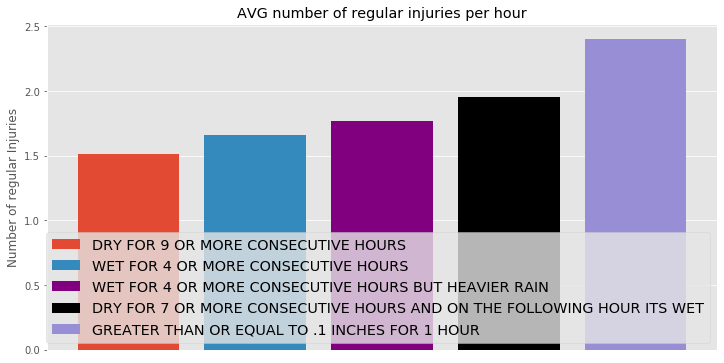

In [40]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.bar(1,avg_dry_nine_hrs,label='DRY FOR 9 OR MORE CONSECUTIVE HOURS')
ax.bar(2,wet_four_hours,label='WET FOR 4 OR MORE CONSECUTIVE HOURS')
ax.bar(3,heavier_rain_4_hours,color='purple',label='WET FOR 4 OR MORE CONSECUTIVE HOURS BUT HEAVIER RAIN')
ax.bar(4,avg_dry_then_rain_on_8_hr,color='black',label='DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET')
ax.bar(5,heavy_rain_one_hour,label='GREATER THAN OR EQUAL TO .1 INCHES FOR 1 HOUR')
ax.set_title('AVG number of regular injuries per hour')
ax.set_ylabel('Number of regular Injuries')
ax.legend(loc='lower right',fontsize='x-large')
ax.get_xaxis().set_visible(False)

In [65]:
print('Null Hypothesis: WET FOR 4 OR MORE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df = welch_satterhwaithe_df(list(dry_then_wet_seven_hrs.values()),list(wet_four_hr_injuries_dict.values()))
test_stat = welch_test_statistic(list(dry_then_wet_seven_hrs.values()),list(wet_four_hr_injuries_dict.values()))
students = stats.t(df)
pvalue = 1 - students.cdf(test_stat) #.sf
print('alpha: .1')
print('pvalue:',pvalue)
print('Do not reject null')


Null Hypothesis: WET FOR 4 OR MORE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.00451340261140154
Do not reject null


In [42]:
avg_dry_nine_hrs#
avg_dry_then_rain_on_8_hr#
heavy_rain_one_hour
heavier_rain_4_hours#
wet_four_hours#

1.6568047337278107

In [66]:
print('Null Hypothesis: DRY FOR 9 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df4 = welch_satterhwaithe_df(list(dry_then_wet_seven_hrs.values()),list(dry_nine_hrs_dict.values()))
test_stat4 = welch_test_statistic(list(dry_then_wet_seven_hrs.values()),list(dry_nine_hrs_dict.values()))
students4 = stats.t(df4)
pvalue4 = 1 - students4.cdf(test_stat4)
print('alpha: .1')
print('pvalue:',pvalue4)
print('reject null')

Null Hypothesis: DRY FOR 9 OR MORE CONSECUTIVE HOURS AND DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 8.361854071048391e-06
reject null


In [69]:
print('Null Hypothesis: WHEN DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND HEAVY RAIN FOR AT LEAST ONE HOUR BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES')
df8 = welch_satterhwaithe_df(list(dry_then_wet_seven_hrs.values()),list(heavy_rain_one_hour_dict.values()))
test_stat8 = welch_test_statistic(list(dry_then_wet_seven_hrs.values()),list(heavy_rain_one_hour_dict.values()))
students8 = stats.t(df8)
pvalue8 = 1 - students8.cdf(test_stat8)
print('alpha: .1')
print('pvalue:',pvalue8)
print('Cannot reject nulll')

Null Hypothesis: WHEN DRY FOR 7 OR MORE CONSECUTIVE HOURS AND ON THE FOLLOWING HOUR ITS WET AND HEAVY RAIN FOR AT LEAST ONE HOUR BOTH HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.7113879374437189
Cannot reject nulll


In [60]:
print('Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND HEAVY RAIN FOR 1 HOUR HAVE THE SAME NUMBER OF REGULAR INJURIES')
df6 = welch_satterhwaithe_df(list(dry_then_wet_seven_hrs.values()),list(heavy_rain_one_hour_dict.values()))
test_stat6 = welch_test_statistic(list(dry_then_wet_seven_hrs.values()),list(heavy_rain_one_hour_dict.values()))
students6 = stats.t(df6)
pvalue6 = students6.cdf(test_stat6)
print('alpha: .1')
print('pvalue:',pvalue6)
print('Must reject null')

Null Hypothesis: DRY FOR 7 OR MORE CONSECUTIVE HOURS AND HEAVY RAIN FOR 1 HOUR HAVE THE SAME NUMBER OF REGULAR INJURIES
alpha: .1
pvalue: 0.2886120625562811
Must reject null


In [52]:
def getaccidentsperhour(df):
    dic=dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [53]:
hourlyaccidents = getaccidentsperhour(file2)
hourlyaccidents

{0: 3828,
 1: 3410,
 2: 3579,
 3: 1638,
 4: 1195,
 5: 1626,
 6: 3152,
 7: 6364,
 8: 8303,
 9: 7824,
 10: 7257,
 11: 7992,
 12: 10117,
 13: 9995,
 14: 10395,
 15: 11296,
 16: 11916,
 17: 12726,
 18: 9590,
 19: 7097,
 20: 6105,
 21: 5497,
 22: 5353,
 23: 4564}